# Домашнее задание

## Задача 1
Постройте график <br>
Назовите график <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы

### 1.1 Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kirkf\Desktop\kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(df.index)

RangeIndex(start=0, stop=21613, step=1)


### 1.2 Изучите стоимости недвижимости

In [6]:
df['price'] = df['price'].astype(int)

0     221900
1     538000
2     180000
3     604000
4     510000
5    1225000
6     257500
Name: price, dtype: int32 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


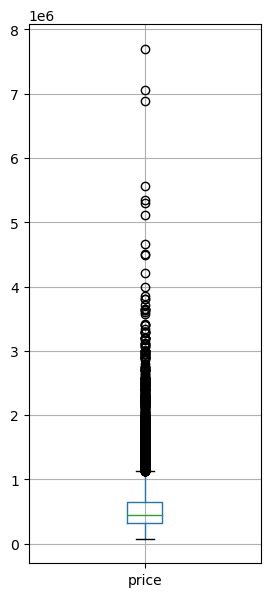

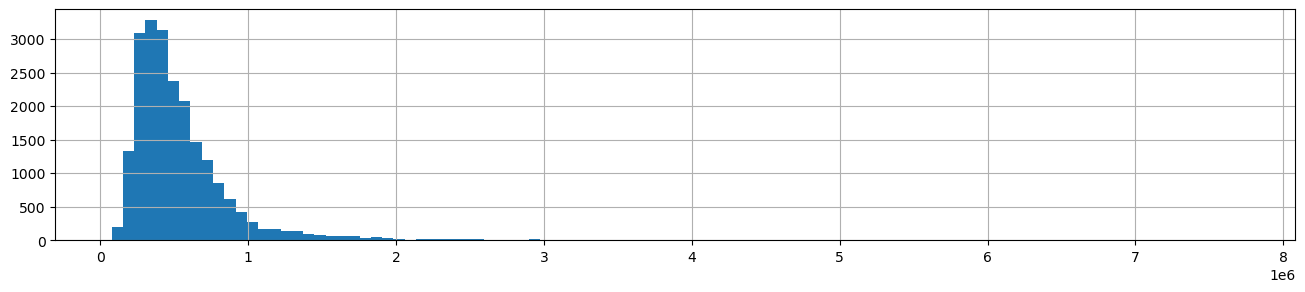

In [7]:
##################################################################################
#------- НАПИШЕМ ФУНКЦИЮ ДЛЯ ОПИСАНИЯ ЧИСЛОВЫХ СТОЛБЦОВ ( Данные + Графика )------ 
def descr_numeric(target_column):  # аргумент функции название столбца
    print(df[target_column].head(7), df[target_column].describe())
    df.boxplot(column=target_column, figsize=(3,7)); 
    plt.show()
    df[target_column].hist(figsize=(16,3), bins=100);
#---------------------------------------------------------------------------------
##################################################################################

descr_numeric('price')

*Есть как сильно большие (7,7млн) так очень маленькие значения (75000р). Рассмотрим всё на графиках.*

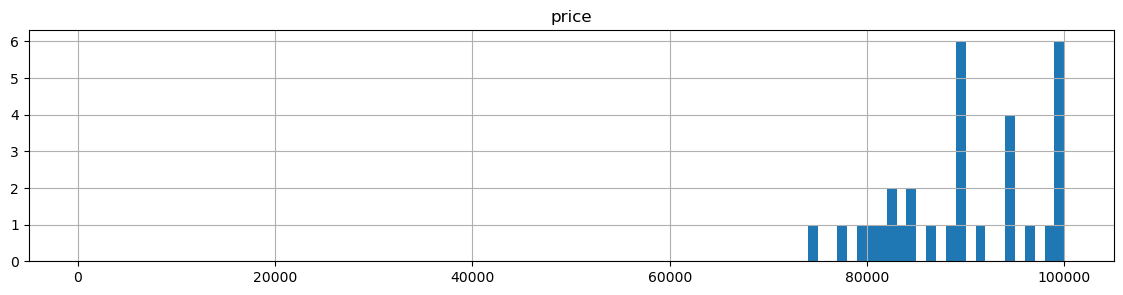

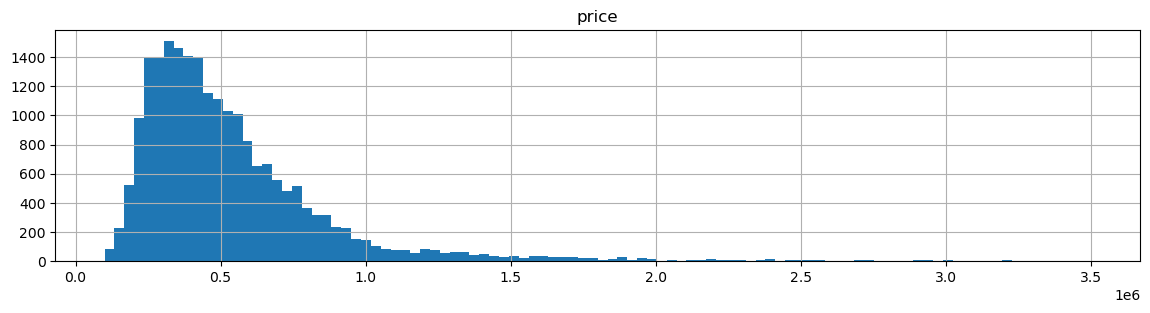

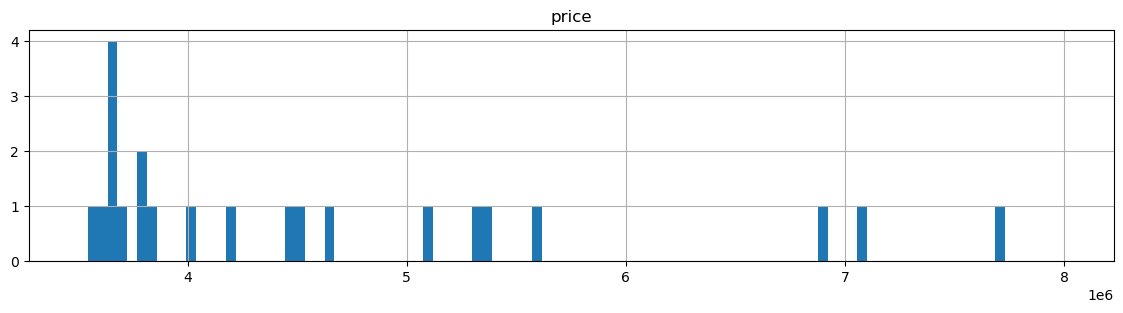

In [8]:
basket = 100
df.hist('price', bins=basket, figsize=(14,3), range=(0, 100_001));
df.hist('price', bins=basket, figsize=(14,3), range=(100_000, 3_500_001));
df.hist('price', bins=basket, figsize=(14,3), range=(3_500_000, 8_000_000));

*Есть "Выбросы". Избавимся от них, чтобы данные были более равномерные. Оставим все что >80тыс.руб и <4млн.р., остальное удалим*

In [9]:
display(df.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df = df.loc[(df['price']>80_000) & (df['price']<4_000_000)]
#data = data.query('400000 < last_price < 100000000')
df.reset_index(inplace=True, drop=True)
print(df.index)
print(df['price'].describe())

RangeIndex(start=0, stop=21598, step=1)
count    2.159800e+04
mean     5.374502e+05
std      3.477907e+05
min      8.100000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      3.850000e+06
Name: price, dtype: float64


In [11]:
display(df.tail())
print(df.index)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21593,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21594,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21595,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21596,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21597,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


RangeIndex(start=0, stop=21598, step=1)


*ВЫВОД: Все получилось столбец готов. Удалили 15 строк с сильными выбросами (21613-21598)*

### 1.3 Изучите распределение квадратуры жилой

0    1180
1    2570
2     770
3    1960
4    1680
5    5420
6    1715
Name: sqft_living, dtype: int64 count    21598.000000
mean      2076.543337
std        905.303062
min        290.000000
25%       1425.500000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


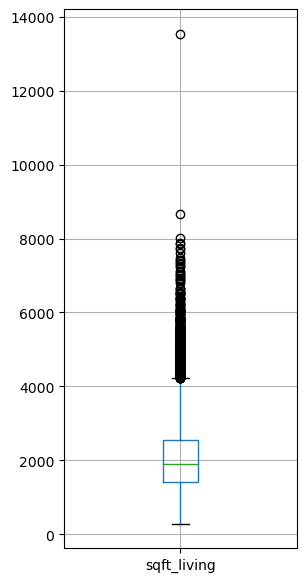

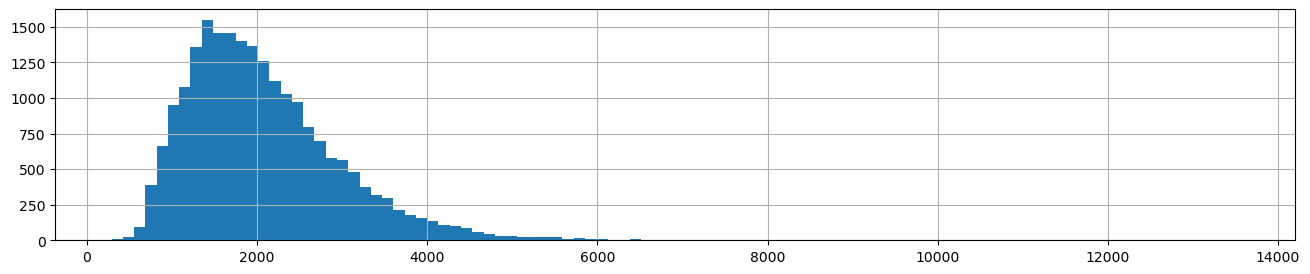

In [12]:
descr_numeric('sqft_living')

*Есть как сильно большие (13540) так очень маленькие значения (290). Рассмотрим всё на графиках.*

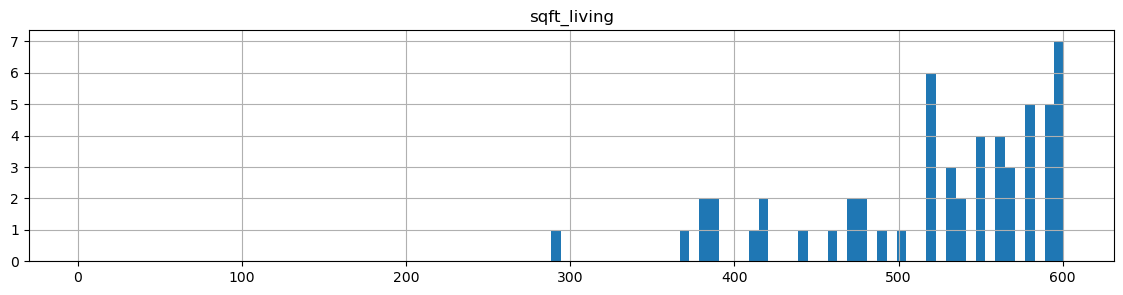

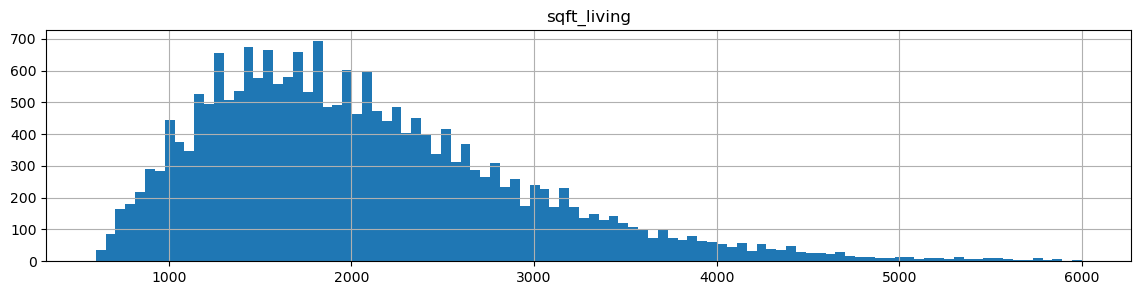

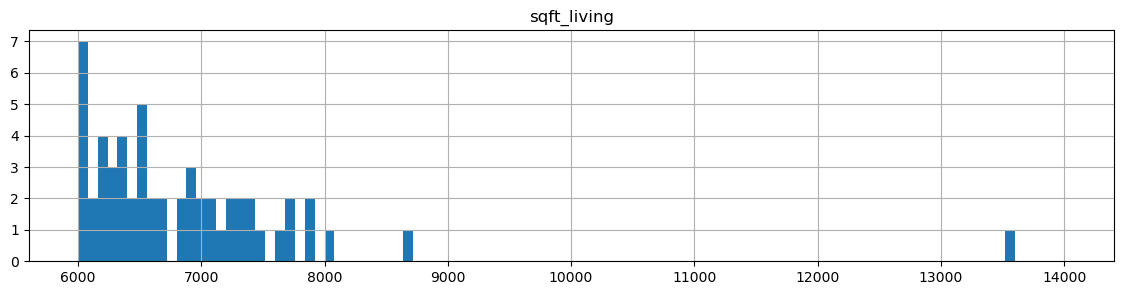

In [16]:
basket = 100
df.hist('sqft_living', bins=basket, figsize=(14,3), range=(0, 601));
df.hist('sqft_living', bins=basket, figsize=(14,3), range=(600, 6_000));
df.hist('sqft_living', bins=basket, figsize=(14,3), range=(6_000, 14_000));

*Есть "Выбросы". Избавимся от них, чтобы данные были более равномерные (хотя можно и оставить их совсем мало, влияние будет незначительным). Оставим все что >350 и <9000, остальное удалим*

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df.index

RangeIndex(start=0, stop=21598, step=1)

In [20]:
df = df.loc[(df['sqft_living']>350) & (df['sqft_living']<9_000)]
df.reset_index(inplace=True, drop=True)
print(df.index)
print(df['sqft_living'].describe())

RangeIndex(start=0, stop=21596, step=1)
count    21596.000000
mean      2076.095249
std        901.895944
min        370.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max       8670.000000
Name: sqft_living, dtype: float64


In [21]:
display(df.tail())
print(df.index)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21591,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21592,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21593,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21594,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21595,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


RangeIndex(start=0, stop=21596, step=1)


*ВЫВОД: Все получилось столбец готов. Удалили 2 строки с сильными выбросами (21598-21596)*

### 1.4 Изучите распределение года постройки

0    1955
1    1951
2    1933
3    1965
4    1987
5    2001
6    1995
Name: yr_built, dtype: int64 count    21596.000000
mean      1970.999352
std         29.370129
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


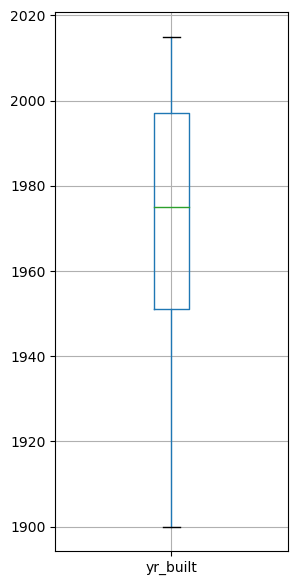

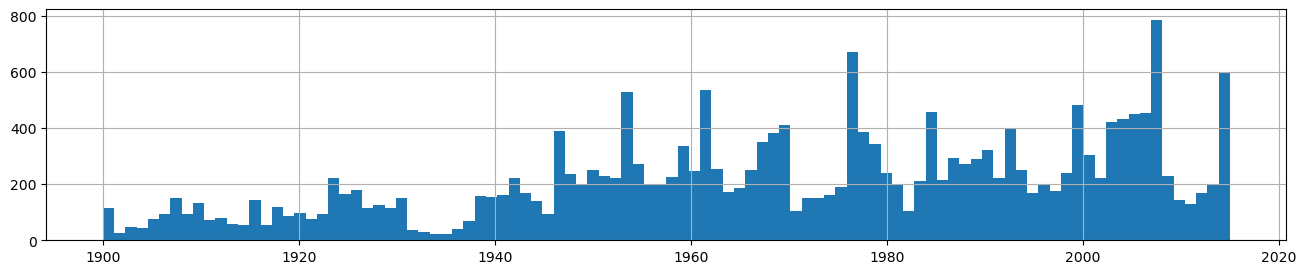

In [23]:
descr_numeric('yr_built')

*ВЫВОД: Разброс довольно равномерный. Оставим всё как есть. Корректный столбец*

## Задача 2
Постройте график <br>
Сделайте выводы 

### 2.1 Изучите распределение домов от наличия вида на набережную

In [27]:
data = df['waterfront'].value_counts()
data

0    21438
1      158
Name: waterfront, dtype: int64

In [28]:
names = data.index
values = data.values

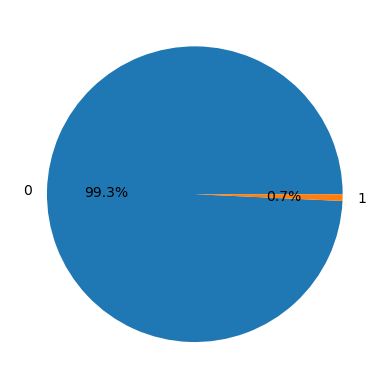

In [29]:
plt.pie(values, autopct='%.1f%%', labels=names);

*ВЫВОД: Доля домов с видом на набережную меньше 1%*

### 2.2 Изучите распределение этажей домов

In [30]:
data = df['floors'].value_counts()
data

1.0    10675
2.0     8231
1.5     1910
3.0      612
2.5      160
3.5        8
Name: floors, dtype: int64

In [56]:
names = data.index
values = data.values
sorted_values = np.delete(values, 5)

In [57]:
sorted_values

array([10675,  8231,  1910,   612,   160], dtype=int64)

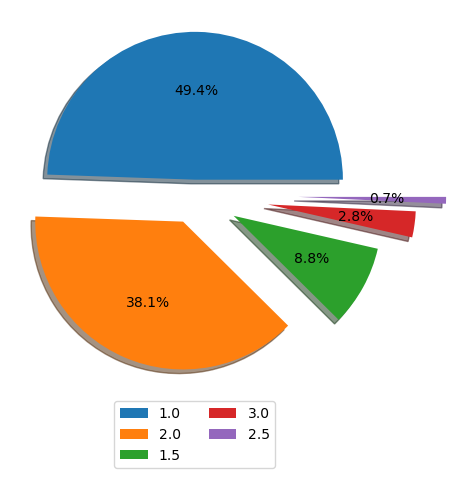

In [59]:
explode = (0.1, 0.2, 0.3, 0.5, 0.7)
plt.pie(sorted_values, autopct='%.1f%%', explode=explode, shadow=True);
plt.legend(labels=names, loc='upper center',
           bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

*ВЫВОД: Доля домов с количеством этажей 3.5 в общем виде составляет 0% от общего "пирога" - их не учитываем. Основную долю занимают дома с количеством этажей от 1 до 2.*

### 2.3 Изучите распределение состояния домов

In [62]:
data = df['grade'].value_counts().sort_index()
data

3        2
4       28
5      241
6     2038
7     8981
8     6068
9     2615
10    1134
11     398
12      81
13      10
Name: grade, dtype: int64

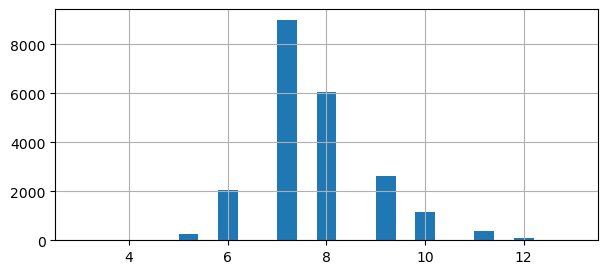

In [67]:
df['grade'].hist(figsize=(7,3), bins=25);

*ВЫВОД: Значимая доля домов имеет оценку от 6 до 10.*

## Задача 3 <br>
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. <br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

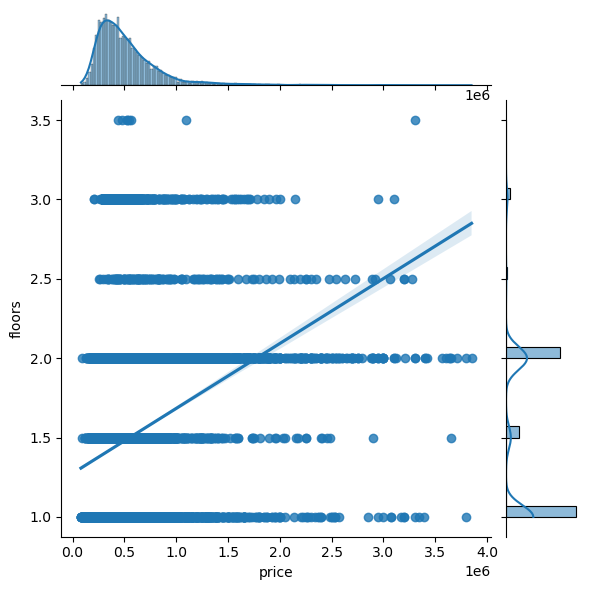

In [83]:
sns.jointplot(x=df['price'], y=df['floors'], kind='reg');

*ВЫВОД: У стоимости домов нет прямой зависимости от количества этажей. На графике явно видно, что дорогие дома встречаются везде вне зависимости от количества этажей.*

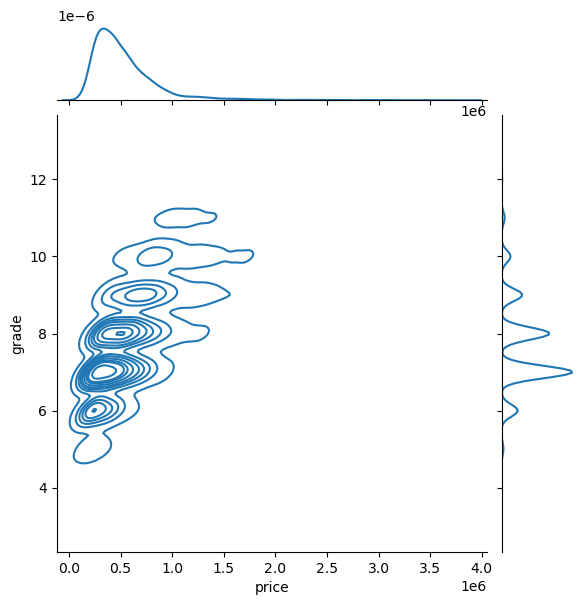

In [84]:
sns.jointplot(x=df['price'], y=df['grade'], kind='kde');

*ВЫВОД: По данному графику взаимного распределения мы наблюдаем прямую зависимость стоимости объекта от его состояния. Так же видно что большинству домов присущи 6, 7 и 8 уровни состояний.*

In [85]:
corr_matrix = df.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.022070,0.000847,0.004141,-0.013886,-0.132007,0.018294,-0.003765,0.010861,-0.023980,0.007283,-0.012502,-0.005215,0.021464,-0.017283,-0.007936,-0.002140,0.020853,-0.003637,-0.138771
price,-0.022070,1.000000,0.309775,0.519034,0.694261,0.090561,0.263468,0.249077,0.396806,0.040462,0.677414,0.597982,0.311183,0.053709,0.123623,-0.051145,0.320358,0.024028,0.597320,0.082916
bedrooms,0.000847,0.309775,1.000000,0.513700,0.577887,0.030255,0.174024,-0.011988,0.075516,0.027707,0.353186,0.475769,0.299998,0.153619,0.017603,-0.152694,-0.009821,0.130537,0.389424,0.027776
bathrooms,0.004141,0.519034,0.513700,1.000000,0.750520,0.085364,0.501744,0.053138,0.179894,-0.126214,0.661440,0.680110,0.273624,0.508996,0.047921,-0.204398,0.023035,0.225704,0.566070,0.084676
sqft_living,-0.013886,0.694261,0.577887,0.750520,1.000000,0.170858,0.355403,0.088905,0.276358,-0.059073,0.762811,0.874138,0.424328,0.321909,0.050858,-0.200577,0.051071,0.244998,0.759085,0.181392
sqft_lot,-0.132007,0.090561,0.030255,0.085364,0.170858,1.000000,-0.006286,0.020894,0.072940,-0.008669,0.112647,0.181806,0.011995,0.052752,0.007596,-0.129518,-0.086106,0.229338,0.143355,0.717854
floors,0.018294,0.263468,0.174024,0.501744,0.355403,-0.006286,1.000000,0.022580,0.027679,-0.264401,0.458169,0.525962,-0.250583,0.489404,0.006013,-0.058918,0.049184,0.125696,0.278745,-0.012380
waterfront,-0.003765,0.249077,-0.011988,0.053138,0.088905,0.020894,0.022580,1.000000,0.398080,0.017742,0.075076,0.060490,0.069840,-0.027712,0.089669,0.031926,-0.016035,-0.042342,0.081790,0.030341
view,0.010861,0.396806,0.075516,0.179894,0.276358,0.072940,0.027679,0.398080,1.000000,0.046623,0.246723,0.158773,0.271644,-0.054696,0.102399,0.086005,0.005116,-0.078788,0.277033,0.070667
condition,-0.023980,0.040462,0.027707,-0.126214,-0.059073,-0.008669,-0.264401,0.017742,0.046623,1.000000,-0.146594,-0.159567,0.176158,-0.362021,-0.060834,0.002765,-0.014946,-0.105986,-0.092845,-0.003041


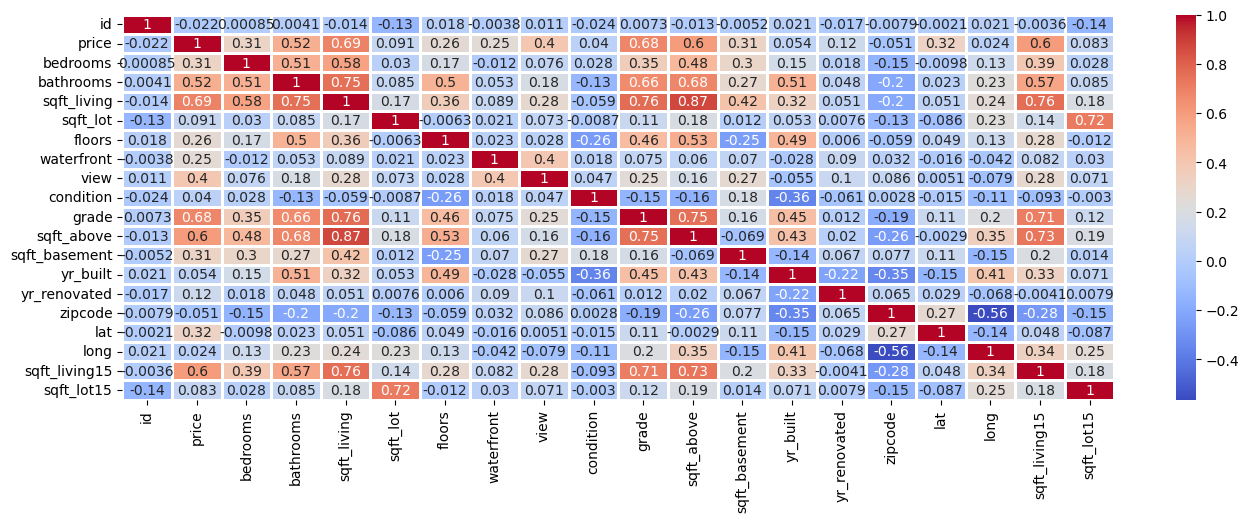

In [91]:
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True, linewidths=.9, cmap='coolwarm');

*ВЫВОД: По данной тепловой карте мы можем отследить корреляцию по отношению к интересующей нас величине. Отслеживая стомость дома, мы явно видим сильную линейную связь с общей жилой площадью, кв. метрами дома, которые находятся выше земли, кв. метрами жилой площади у 15 соседей и состоянием дома. Средняя линейная зависимость с количеством ванных комнат. Слабая линейная зависимость с кличеством спален, количеством этажей, наличием набережной, кв. метрами дома, которые находятся ниже земли и широтой.*